<font size=5> **[넷플릭스 데이터를 활용한 추천 시스템 개발]** </font>
- netflix_titles.csv 데이터를 활용하여 주요 데이터 시각화 및 추천 시스템을 개발하시오
- 각 마크다운 셀의 내용을 참고하여 비어있는 코드 셀에 코드를 작성한다.
- 제시된 아웃풋은 참고이며 반드시 동일할 필요는 없다.

# 데이터 로딩

In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

netflix = pd.read_csv('dataset/netflix_titles.csv')
netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [72]:
movie =netflix['type'] == 'Movie'
tv =netflix['type'] == 'TV Show'
movie = len(netflix[movie])
tv = len(netflix[tv])

# 주요 데이터 시각화

## TV Show vs Movies (콘텐츠 타입) 막대 그래프

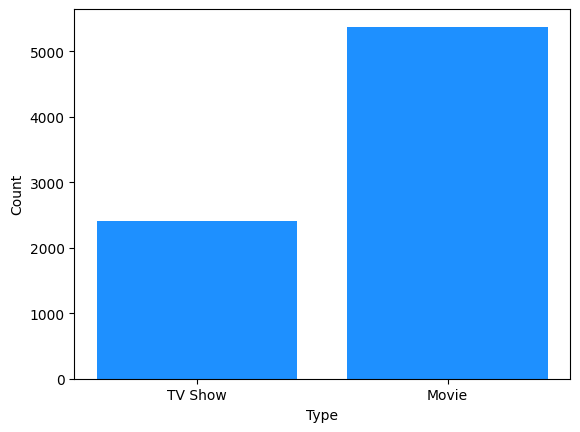

In [175]:
import matplotlib.pyplot as plt
labels = ['TV Show','Movie']
type = [tv,movie]

x = np.arange(len(type))

plt.bar(x, type,color = 'dodgerblue')

plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(x,labels)
plt.show()

[참고]
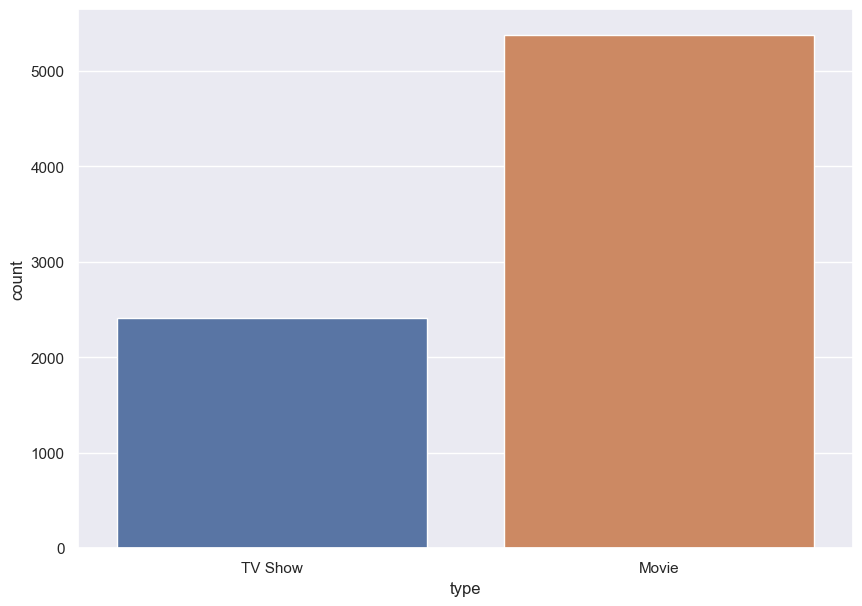

## 제작 국가별 수평 막대 그래프
- 결측 값 확인 및 결측 값을 포함한 레코드 삭제
- 2개 이상의 제작국가 값을 가지고 있는 레코드는 ‘,’를 기준으로 분류하여 카운팅 한다.
- 상위 10개국에 대한 막대그래프를 그린다.

In [83]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [147]:
netflix = netflix.dropna()
country = netflix['country'].values
country
usa = netflix['country'] == 'United States'
usa = len(netflix[usa])
india = netflix['country'] == 'India'
india = len(netflix[india])
uk = netflix['country'] == 'United Kingdom'
uk = len(netflix[uk])
canada = netflix['country'] == 'Canada'
canada = len(netflix[canada])
france = netflix['country'] == 'France'
france = len(netflix[france])
japan = netflix['country'] == 'Japan'
japan = len(netflix[japan])
spain = netflix['country'] == 'Spain'
spain = len(netflix[spain])
korea = netflix['country'] == 'South Korea'
korea = len(netflix[korea])
germany = netflix['country'] == 'Germany'
germany = len(netflix[germany])
mexico = netflix['country'] == 'Mexico'
mexico = len(netflix[mexico])

print(usa,india,uk,canada,france,japan,spain,korea,germany,mexico)

1653 832 174 104 66 76 83 43 36 59


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1653, 832, 174, 104, 66, 76, 83, 43, 36, 59]


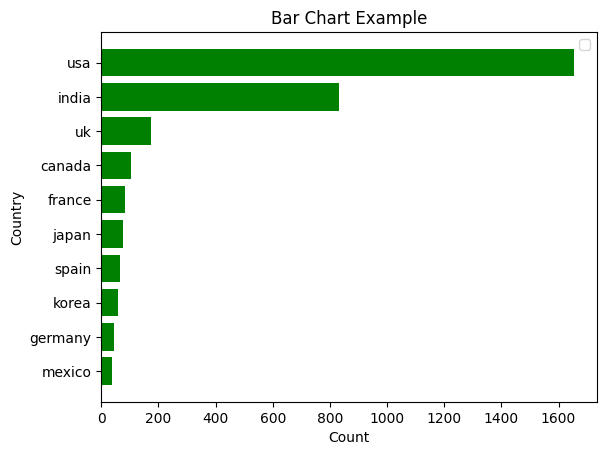

In [193]:
x= ['usa','india','uk','canada','france','japan','spain','korea','germany','mexico']
y = [usa,india,uk,canada,france,japan,spain,korea,germany,mexico]
print(y)
x = x[::-1]
y2 = np.sort(y)

plt.barh(x,y2, color = 'green',linewidth =3)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Bar Chart Example')
plt.yticks(np.arange(len(x)))
plt.legend()
plt.show()

[참고]
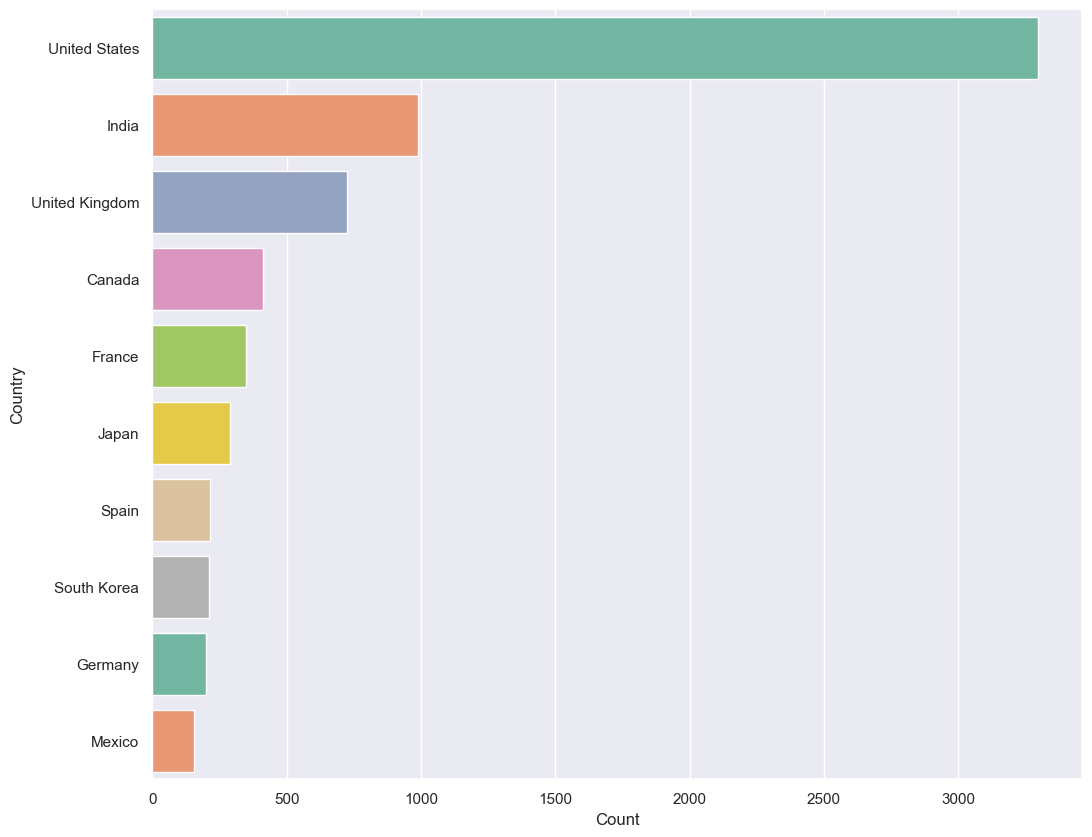

# 제목, 장르, 요약내용 특성 값을 기반으로 한 콘텐츠 기반 필터링 추천

## 데이터 전처리

### 추천 알고리즘 분석과 관련한 컬럼만 추출
- 추출 대상 컬럼: 'show_id', 'title', 'listed_in', 'description'    

In [117]:
netflix = pd.read_csv('dataset/netflix_titles.csv')
netflix_df = netflix[['show_id','title','listed_in','description']]
netflix_df.head()

,show_id,title,listed_in,description
0,s1,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,Dramas,A brilliant group of students become card-coun...


,show_id,title,listed_in,description
0,s1,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,Dramas,A brilliant group of students become card-coun...


### DTM(Document Term Matrix) 생성
- title, listed_in, description 컬럼에 대해 피쳐 카운터 백터를 생성한다.
    - CounterVectorizer 또는 TfidfVectorizer 클래스를 이용한다.
    - nltk 라이브러리의 stopwords 패키지와 string 패키지의 punctuation을 합쳐 불용어 목록을 만들어 구두점 및 불용어를 제거한다.
    - title, listed_in, description 각 컬럼의 피처 벡터화한 결과를 **matrix_netflix_vocab = []** 리스트에 저장한다.

In [118]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

netflix_df['listed_in_literal'] = netflix_df['listed_in'].apply(lambda x : ''.join(x))
netflix_df['listed_in_literal']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7785                   International TV Shows, Reality TV
7786                      Documentaries, Music & Musicals
Name: listed_in_literal, Length: 7787, dtype: object

In [198]:
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(netflix_df['listed_in_literal'])
print(genre_mat.shape)  
print(genre_mat.toarray()[0])

(7787, 215)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [199]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:3])

(7787, 7787)
[[1.         0.18650096 0.0695048  ... 0.0695048  0.62869461 0.        ]
 [0.18650096 1.         0.59628479 ... 0.4472136  0.13483997 0.        ]
 [0.0695048  0.59628479 1.         ... 0.44444444 0.10050378 0.        ]]


In [201]:
genre_sim_sortes_idx = genre_sim.argsort()[:, ::-1]

# 첫 번째 영화와 장르 유사도가 높은 top10 영화의 movies_df 상에서 index 값
# 앞의 0 인덱스는 자기 자신의 인덱스를 가리킨다
print(genre_sim_sortes_idx[1][:11])

[5361 2639 5174 5176 5178 3796   74 1405 6560 5871 3248]


In [137]:
from nltk import sent_tokenize
nltk.download('punkt')
from nltk import word_tokenize
def tokenize_text(text):
    
    sentences = sent_tokenize(text)
    word_tokens = [ word_tokenize(sentence) for sentence in sentences ]
    return word_tokens



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [131]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 콘텐츠 유사도 측정

- title, listed_in, description 각 컬럼에 대해 피처 백터화 한 값을 이용하여 각각의 코사인 유사도를 산출하여 **matrix_netflix_sim = []** 리스트에 저장한다.

- title, listed_in, description에 대해 각각 유사도가 높은 순으로 정렬한 콘텐츠의 인덱스를 **netflix_sim_sorted_ind = []** 리스트에 저장한다.

# 유사도 필터링을 이용한 넷플릭스 콘텐츠 추천

- 추천 기준이 되는 콘텐츠의 제목으로 해당 콘텐츠의 netflix_df 데이터 프레임에서의 레코드 인덱스를 추출한다.
- 해당 인덱스로 sorted_ind_list 인자로 입력된 netflix_sim_sorted_ind 객체에서 각 컬럼별 유사도 순으로 top_n 개의 index를 추출한 후 리스트에 저장한다.
- 함수 매개변수
    - df: 넷플릭스 콘텐츠 정보 DataFrame
    - sorted_ind_list: title, listed_in, description에 대해 각각 유사도가 높은 순으로 정렬한 콘텐츠의 인덱스 행렬을 저장한 리스트
    - title_name: 추천 기준이 되는 콘텐츠 제목 (해당 콘텐츠와 장르 유사도가 높은 콘텐츠를 추천)
    - top_n: 추천 콘텐츠 건수

In [50]:
# 완성된 함수가 아니며, 위 마크다운 셀의 내용을 참고하여 함수 안의 코드를 완성한다.

def find_sim_netflix(df, sorted_ind_list, title_name, top_n=10):
    
    
    # 각 컬럼별 유사도 순으로 top_n 개의 index를 추출한 행렬을 저장할 리스트
    similar_indexes_list = []
    
    
    # 데이터 프레임의 인덱스 값으로 사용하기 위해 1차원 데이터로 변환한다.
    return df.iloc[np.array(similar_indexes_list).flatten()]

In [51]:
# '응답하라 1988' 과 제목, 장르, 줄거리가 유사한 콘텐츠를 각각 10개씩 추천
similar_netflix = find_sim_netflix(netflix_df, netflix_sim_sorted_ind, 'Reply 1988',10)

In [53]:
similar_netflix[['title']]

,title
5161,Reply 1988
5162,Reply 1994
5163,Reply 1997
2599,Hannah Gadsby: Nanette
2598,Hannah Gadsby: Douglas
2597,Hank: Five Years from the Brink
2596,Hangman
2595,Hangar 1: The UFO Files
2594,Handsome: A Netflix Mystery Movie
7786,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
